<a href="https://colab.research.google.com/github/rsinha15/Major-project/blob/main/raka_major.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('/content/COVID-19 Cases(11-12-2020).csv')
df

,S. No.,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death
0,1,12/03/2020,India,74,71,3.0,0.0
1,2,13/03/2020,India,75,71,3.0,1.0
2,3,14/03/2020,India,84,72,10.0,2.0
3,4,15/03/2020,India,107,95,10.0,2.0
4,5,16/03/2020,India,114,99,13.0,2.0
...,...,...,...,...,...,...,...
9916,9917,06/12/2020,World,65870030,64346447,NaN,1523583.0
9917,9918,07/12/2020,World,66422058,64889640,NaN,1532418.0
9918,9919,08/12/2020,World,67210778,65670001,NaN,1540777.0
9919,9920,09/12/2020,World,67780361,66229147,NaN,1551214.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9921 entries, 0 to 9920
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S. No.            9921 non-null   int64  
 1   Date              9921 non-null   object 
 2   Region            9921 non-null   object 
 3   Confirmed Cases   9921 non-null   int64  
 4   Active Cases      9921 non-null   int64  
 5   Cured/Discharged  9671 non-null   float64
 6   Death             9920 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 542.7+ KB


In [3]:
df['Region'].unique()

array(['India', 'Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'State assignment pending',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', 'World'], dtype=object)

In [5]:
#Removing unneccessary data
index_names = df[ df['Region'] == 'World' ].index 
df.drop(index_names, inplace = True) 

In [6]:
#Converting to date time
df['Date'] =pd.to_datetime(df['Date'])

In [7]:
df

,S. No.,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death
0,1,2020-12-03,India,74,71,3.0,0.0
1,2,2020-03-13,India,75,71,3.0,1.0
2,3,2020-03-14,India,84,72,10.0,2.0
3,4,2020-03-15,India,107,95,10.0,2.0
4,5,2020-03-16,India,114,99,13.0,2.0
...,...,...,...,...,...,...,...
9667,9668,2020-07-12,West Bengal,502840,23894,470223.0,8723.0
9668,9669,2020-08-12,West Bengal,505054,23829,472454.0,8771.0
9669,9670,2020-09-12,West Bengal,507995,23750,475425.0,8820.0
9670,9671,2020-10-12,West Bengal,510951,23650,478434.0,8867.0


In [8]:
# Highest Active cases in India on
df[df['Active Cases']==df['Active Cases'].max()]  

,S. No.,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death
190,191,2020-09-18,India,5214677,1017754,4112551.0,84372.0


In [9]:
# Highest Recovery rate in India on
df['Recovered']=df['Confirmed Cases']-df['Cured/Discharged']
df['Recovery Rate']=(df['Recovered']/df['Confirmed Cases']) *100
d1=df[df['Region']=='India']
d1[d1['Recovery Rate']==d1['Recovery Rate'].max()]  

,S. No.,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death,Recovered,Recovery Rate
1,2,2020-03-13,India,75,71,3.0,1.0,72.0,96.0


In [11]:
#Considering all the states, hence dropping data of region India
index_names1 = df[ df['Region'] == 'India' ].index 
df.drop(index_names1, inplace = True)
index_names2 = df[ df['Region'] == 'State assignment pending' ].index 
df.drop(index_names2, inplace = True)
df.reset_index()

,index,S. No.,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death,Recovered,Recovery Rate
0,275,276,2020-03-27,Andaman and Nicobar Islands,1,1,0.0,0.0,1.0,100.000000
1,276,277,2020-03-28,Andaman and Nicobar Islands,6,6,0.0,0.0,6.0,100.000000
2,277,278,2020-03-29,Andaman and Nicobar Islands,9,9,0.0,0.0,9.0,100.000000
3,278,279,2020-03-30,Andaman and Nicobar Islands,9,9,0.0,0.0,9.0,100.000000
4,279,280,2020-03-31,Andaman and Nicobar Islands,10,10,0.0,0.0,10.0,100.000000
...,...,...,...,...,...,...,...,...,...,...
9304,9667,9668,2020-07-12,West Bengal,502840,23894,470223.0,8723.0,32617.0,6.486556
9305,9668,9669,2020-08-12,West Bengal,505054,23829,472454.0,8771.0,32600.0,6.454755
9306,9669,9670,2020-09-12,West Bengal,507995,23750,475425.0,8820.0,32570.0,6.411480
9307,9670,9671,2020-10-12,West Bengal,510951,23650,478434.0,8867.0,32517.0,6.364015


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9309 entries, 275 to 9671
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   S. No.            9309 non-null   int64         
 1   Date              9309 non-null   datetime64[ns]
 2   Region            9309 non-null   object        
 3   Confirmed Cases   9309 non-null   int64         
 4   Active Cases      9309 non-null   int64         
 5   Cured/Discharged  9309 non-null   float64       
 6   Death             9309 non-null   float64       
 7   Recovered         9309 non-null   float64       
 8   Recovery Rate     9167 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 727.3+ KB


In [13]:
# Peak of various states
df.groupby('Region')['Active Cases'].max()

Region
Andaman and Nicobar Islands                   1154
Andhra Pradesh                              103521
Arunachal Pradesh                             3068
Assam                                        34496
Bihar                                        32636
Chandigarh                                    3171
Chhattisgarh                                 38198
Dadra and Nagar Haveli and Daman and Diu       464
Delhi                                        44456
Goa                                           5920
Gujarat                                      16809
Haryana                                      21682
Himachal Pradesh                              8644
Jammu and Kashmir                            22032
Jharkhand                                    15726
Karnataka                                   120948
Kerala                                       97520
Ladakh                                        1299
Lakshadweep                                      0
Madhya Pradesh          

In [14]:
# Highest Active cases in which State 
df[df['Active Cases']==df['Active Cases'].max()]  

,S. No.,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death,Recovered,Recovery Rate
5623,5624,2020-09-18,Maharashtra,1145840,302135,812354.0,31351.0,333486.0,29.104063


In [16]:
# Recovery rates in each State 
gk=df.groupby('Region')['Recovery Rate'].mean()
gk

Region
Andaman and Nicobar Islands                 23.783747
Andhra Pradesh                              40.393512
Arunachal Pradesh                           38.544012
Assam                                       33.593974
Bihar                                       33.860386
Chandigarh                                  36.031201
Chhattisgarh                                35.254610
Dadra and Nagar Haveli and Daman and Diu    33.605387
Delhi                                       35.729873
Goa                                         32.414416
Gujarat                                     36.064647
Haryana                                     32.385161
Himachal Pradesh                            38.298310
Jammu and Kashmir                           42.421059
Jharkhand                                   38.536684
Karnataka                                   43.555182
Kerala                                      38.815386
Ladakh                                      34.076205
Lakshadweep          

In [17]:
#Highest recovery rate
gk.max()

45.23598209423069

In [19]:
#Forecasting
df = pd.read_csv('/content/COVID-19 Cases(11-12-2020).csv')
df['Date'] =pd.to_datetime(df['Date'])
index_names = df[ df['Region'] == 'World' ].index 
df.drop(index_names, inplace = True)
index_names2 = df[ df['Region'] == 'State assignment pending' ].index 
df.drop(index_names2, inplace = True)
df2=df.loc[df['Region']== 'India'].reset_index()
df2

,index,S. No.,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death
0,0,1,2020-12-03,India,74,71,3.0,0.0
1,1,2,2020-03-13,India,75,71,3.0,1.0
2,2,3,2020-03-14,India,84,72,10.0,2.0
3,3,4,2020-03-15,India,107,95,10.0,2.0
4,4,5,2020-03-16,India,114,99,13.0,2.0
...,...,...,...,...,...,...,...,...
270,270,271,2020-07-12,India,9677203,396729,9139901.0,140573.0
271,271,272,2020-08-12,India,9703770,383866,9178946.0,140958.0
272,272,273,2020-09-12,India,9735850,378909,9215581.0,141360.0
273,273,274,2020-10-12,India,9767371,372293,9253306.0,141772.0


In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             275 non-null    int64         
 1   S. No.            275 non-null    int64         
 2   Date              275 non-null    datetime64[ns]
 3   Region            275 non-null    object        
 4   Confirmed Cases   275 non-null    int64         
 5   Active Cases      275 non-null    int64         
 6   Cured/Discharged  275 non-null    float64       
 7   Death             275 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 17.3+ KB


In [21]:
df_new = df2[['Date','Active Cases']]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          275 non-null    datetime64[ns]
 1   Active Cases  275 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.4 KB


In [22]:
df_new = df_new.rename(columns = {'Date':'ds','Active Cases':'y'})
df_new

,ds,y
0,2020-12-03,71
1,2020-03-13,71
2,2020-03-14,72
3,2020-03-15,95
4,2020-03-16,99
...,...,...
270,2020-07-12,396729
271,2020-08-12,383866
272,2020-09-12,378909
273,2020-10-12,372293


In [23]:
df_new.to_csv('IndiaCovid.csv',index=False)

In [24]:
import fbprophet 
op = fbprophet.Prophet(changepoint_prior_scale=0.5)
op.fit(df_new)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
forecast = op.make_future_dataframe(periods = 12,freq='M')
forecast = op.predict(forecast)
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-04,3.723048e+05,6.199395e+04,687395.238896
1,2020-01-05,3.913953e+05,4.401155e+04,680776.511272
2,2020-01-06,4.012889e+05,9.989216e+04,702214.183214
3,2020-01-07,4.008337e+05,6.251496e+04,723045.106326
4,2020-01-08,3.993762e+05,6.921936e+04,722178.483394
...,...,...,...,...
282,2021-07-31,-6.729703e+05,-1.363893e+06,125624.996735
283,2021-08-31,-7.746189e+05,-1.611972e+06,166956.290668
284,2021-09-30,-9.065961e+05,-1.929737e+06,218237.834869
285,2021-10-31,-1.061946e+06,-2.185273e+06,122370.731184


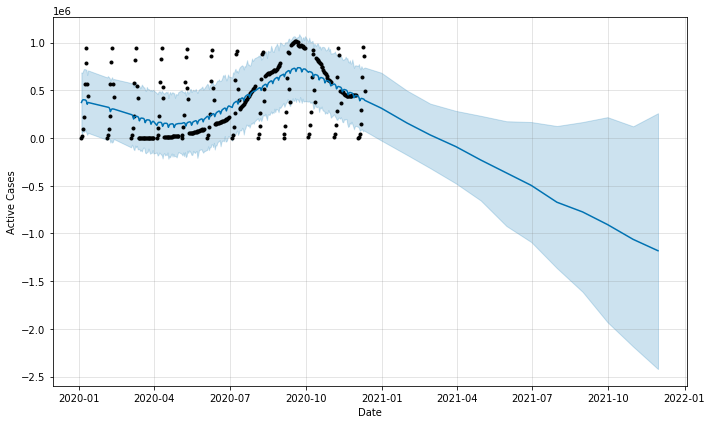

In [26]:
op.plot(forecast,xlabel='Date',ylabel='Active Cases');